# Actividad 2_10: Repaso

En esta Actividad vamos a repasar los conceptos que hemos visto hasta ahora en clase.

Descarga el archivo "Top 100 Cryptocurrency 2022.csv" que se adjunta con la tarea y realiza los siguientes apartados:

Debes escribir una programa que realice las siguientes tareas:

1. Importar los datos del dataset adjunto con la tarea y guardarlos en un DataFrame.
2. Crea una función que reciba un número (debes tratar la excepción en caso de que no sea un entero) y el dataframe y devuelva un DataFrame en el que haya eliminado todas las criptomonedas que no superen el número pasado como parámetro. Prueba la función.
3. Normaliza la columna del precio actual de las criptomonedas ("Price") y muestre una gráfica con los valores de las 10 que tienen mayor valor.
4. Predice el próximo valor de las criptomonedas suponiendo que la variación de las próximas 24h  va a ser la misma que en las anteriores ('Changes 24H') y mételo en una columna nueva.

In [12]:
#Código
import pandas as pd
criptos = pd.read_csv('Top 100 Cryptocurrency 2022.csv')
criptos.head()

,Ranking,Crypto Name,Price,Changes 24H,Changes 7D,Changes 30D,Changes 1Y,Market Cap,Volume 24H,Available Supply
0,1,BITCOIN,"$36,983",-2.97%,1.96%,-20.08%,8.25%,$701.49 B,$13.01 B,18.94 M BTC
1,2,WRAPPED BITCOIN,"$37,019",-2.84%,1.84%,-20.13%,8.26%,$10.04 B,$253.14 M,271.16 K WBTC
2,3,HUOBI BTC,"$36,942",-4.24%,1.37%,-20.39%,7.82%,$1.47 B,$29.51 M,39.88 K HBTC
3,4,ETHEREUM,"$2,510",-3.64%,-1.28%,-32.04%,82.54%,$298.87 B,$10.00 B,119.38 M ETH
4,5,LIDO STAKED ETHER,"$2,494",-3.23%,-1.84%,-31.98%,95.88%,$4.48 B,$2.07 M,1.79 M STETH


In [13]:
#Voy a poner la columna Price con valores float en vez de string
precios_int = []
for index,row in criptos.iterrows():
    precios_int.append(float(row['Price'][1:].replace(',','')))
    #precios_int.append(float(row['Price'].replace(',','').replace('$','')))
criptos['Price'] = precios_int    

In [14]:
criptos.head()

,Ranking,Crypto Name,Price,Changes 24H,Changes 7D,Changes 30D,Changes 1Y,Market Cap,Volume 24H,Available Supply
0,1,BITCOIN,36983.0,-2.97%,1.96%,-20.08%,8.25%,$701.49 B,$13.01 B,18.94 M BTC
1,2,WRAPPED BITCOIN,37019.0,-2.84%,1.84%,-20.13%,8.26%,$10.04 B,$253.14 M,271.16 K WBTC
2,3,HUOBI BTC,36942.0,-4.24%,1.37%,-20.39%,7.82%,$1.47 B,$29.51 M,39.88 K HBTC
3,4,ETHEREUM,2510.0,-3.64%,-1.28%,-32.04%,82.54%,$298.87 B,$10.00 B,119.38 M ETH
4,5,LIDO STAKED ETHER,2494.0,-3.23%,-1.84%,-31.98%,95.88%,$4.48 B,$2.07 M,1.79 M STETH


In [17]:
#2
def superior_a (df,valor):
    try:
        nuevo_df = df.loc[df['Price']>valor]
    except ValueError:
        print('No has metido un entero')
    return nuevo_df

df_nuevo = superior_a(criptos,10000)
df_nuevo.head()


,Ranking,Crypto Name,Price,Changes 24H,Changes 7D,Changes 30D,Changes 1Y,Market Cap,Volume 24H,Available Supply
0,1,BITCOIN,36983.0,-2.97%,1.96%,-20.08%,8.25%,$701.49 B,$13.01 B,18.94 M BTC
1,2,WRAPPED BITCOIN,37019.0,-2.84%,1.84%,-20.13%,8.26%,$10.04 B,$253.14 M,271.16 K WBTC
2,3,HUOBI BTC,36942.0,-4.24%,1.37%,-20.39%,7.82%,$1.47 B,$29.51 M,39.88 K HBTC


<BarContainer object of 10 artists>

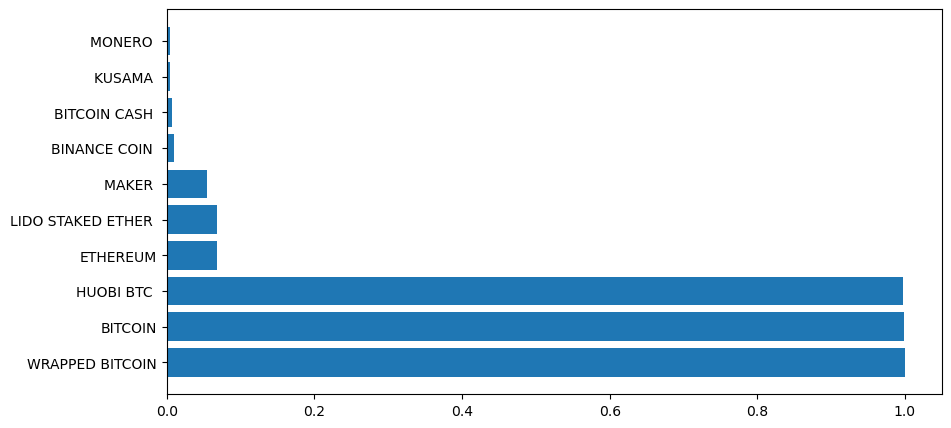

In [18]:
#3
import matplotlib.pyplot as plt
#Creo un nuevo dataframe para normalizarlo (luego necesitaré los datos sin normalizar)
criptos_norm = pd.DataFrame(criptos)
#Otra manera que hemos visto es con MinMaxScaler
criptos_norm['Price'] = (criptos_norm['Price'] - criptos_norm['Price'].min()) / (criptos_norm['Price'].max() - criptos_norm['Price'].min())
criptos_norm.sort_values(by='Price',ascending=False,inplace=True)
criptos_pintar = criptos_norm.iloc[0:10]
plt.figure(figsize=(10,5))
plt.barh(criptos_pintar['Crypto Name'],criptos_pintar['Price'])

In [19]:
#4
#Lo primero, voy a convertir changes 24H en un float
#ojo que Changes 24H tiene un espacio al final. Se ve si haces print(criptos.keys())
#He visto que hay valores de esa columna que dan error, así que hago lo siguiente para comprobar que pasa:
for index,row in criptos.iterrows():
    try:
        float(row['Changes 24H '][:-1])
    except:
        print(row['Changes 24H '][:-1])

#Viendo que el problema es que hay dos valores que tienen el $ y no están puestos como %, tengo dos opciones, 
# o asumo que son valores porcentuales o me los cargo. En este caso me los voy a cargar.


$1.36
$0.00


In [20]:
#Filtro y me quedo solo con los valores que tienen %
criptos = criptos.loc[criptos['Changes 24H '].str.contains('%')]

#Compruebo que lo he hecho bien, no debería pintar nada.
for index,row in criptos.iterrows():
    try:
        float(row['Changes 24H '][:-1])
    except:
        print(row['Changes 24H '][:-1])

cambios_24 = []
for index,row in criptos.iterrows():
    cambios_24.append(float(row['Changes 24H '][:-1])/100)
criptos['Changes 24H '] = cambios_24   

C:\Users\Equipo\AppData\Local\Temp\ipykernel_6428\1815652874.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criptos['Changes 24H '] = cambios_24


In [103]:
criptos.head()

,Ranking,Crypto Name,Price,Changes 24H,Changes 7D,Changes 30D,Changes 1Y,Market Cap,Volume 24H,Available Supply
0,1,BITCOIN,36983.0,-0.0297,1.96%,-20.08%,8.25%,$701.49 B,$13.01 B,18.94 M BTC
1,2,WRAPPED BITCOIN,37019.0,-0.0284,1.84%,-20.13%,8.26%,$10.04 B,$253.14 M,271.16 K WBTC
2,3,HUOBI BTC,36942.0,-0.0424,1.37%,-20.39%,7.82%,$1.47 B,$29.51 M,39.88 K HBTC
3,4,ETHEREUM,2510.0,-0.0364,-1.28%,-32.04%,82.54%,$298.87 B,$10.00 B,119.38 M ETH
4,5,LIDO STAKED ETHER,2494.0,-0.0323,-1.84%,-31.98%,95.88%,$4.48 B,$2.07 M,1.79 M STETH


In [106]:
criptos['Price tomorrow'] = criptos['Price'] + criptos['Price'] * criptos['Changes 24H ']

/tmp/ipykernel_9192/1080140237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criptos['Price tomorrow'] = criptos['Price'] + criptos['Price'] * criptos['Changes 24H ']


In [107]:
criptos.head()

,Ranking,Crypto Name,Price,Changes 24H,Changes 7D,Changes 30D,Changes 1Y,Market Cap,Volume 24H,Available Supply,Price tomorrow
0,1,BITCOIN,36983.0,-0.0297,1.96%,-20.08%,8.25%,$701.49 B,$13.01 B,18.94 M BTC,35884.6049
1,2,WRAPPED BITCOIN,37019.0,-0.0284,1.84%,-20.13%,8.26%,$10.04 B,$253.14 M,271.16 K WBTC,35967.6604
2,3,HUOBI BTC,36942.0,-0.0424,1.37%,-20.39%,7.82%,$1.47 B,$29.51 M,39.88 K HBTC,35375.6592
3,4,ETHEREUM,2510.0,-0.0364,-1.28%,-32.04%,82.54%,$298.87 B,$10.00 B,119.38 M ETH,2418.6360
4,5,LIDO STAKED ETHER,2494.0,-0.0323,-1.84%,-31.98%,95.88%,$4.48 B,$2.07 M,1.79 M STETH,2413.4438
